In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [135]:
train_df = pd.read_csv("train.csv")
train_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [136]:
test_df = pd.read_csv("test.csv")
test_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [137]:
train_df['type']='train'
test_df['type']='test'

data = pd.concat([train_df, test_df],ignore_index=True)
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales   type  
0  Supermarket Type1          3735.1380  train  
1  Supermarket Type2           443.4228  train  
2  Supermarket Type1          2097.2700  train  
3      Grocery Store           732.3800  train  
4  Supermarket Type1           994.7052  train

# EDA

<AxesSubplot:title={'center':'Missing Values'}>

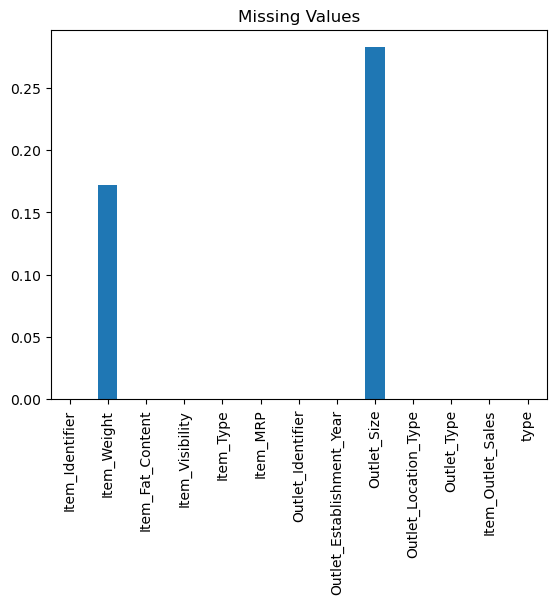

In [138]:
train_df.isna().mean().plot(kind='bar',title="Missing Values")

In [139]:
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
type                            0
dtype: int64

<AxesSubplot:xlabel='Item_Identifier'>

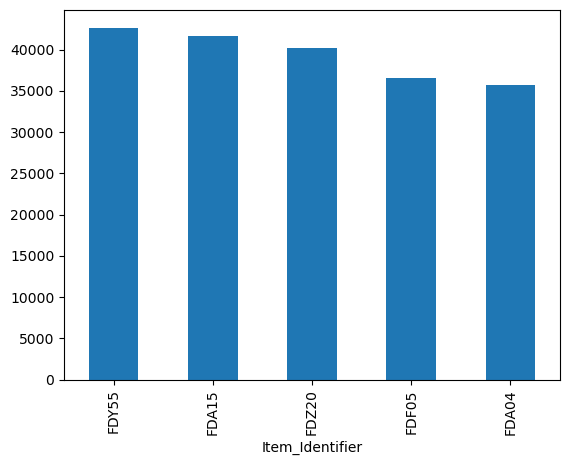

In [140]:
train_df.groupby("Item_Identifier")['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

In [141]:
train_df.select_dtypes(include=['object']).columns.drop('Item_Identifier')

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'type'],
      dtype='object')

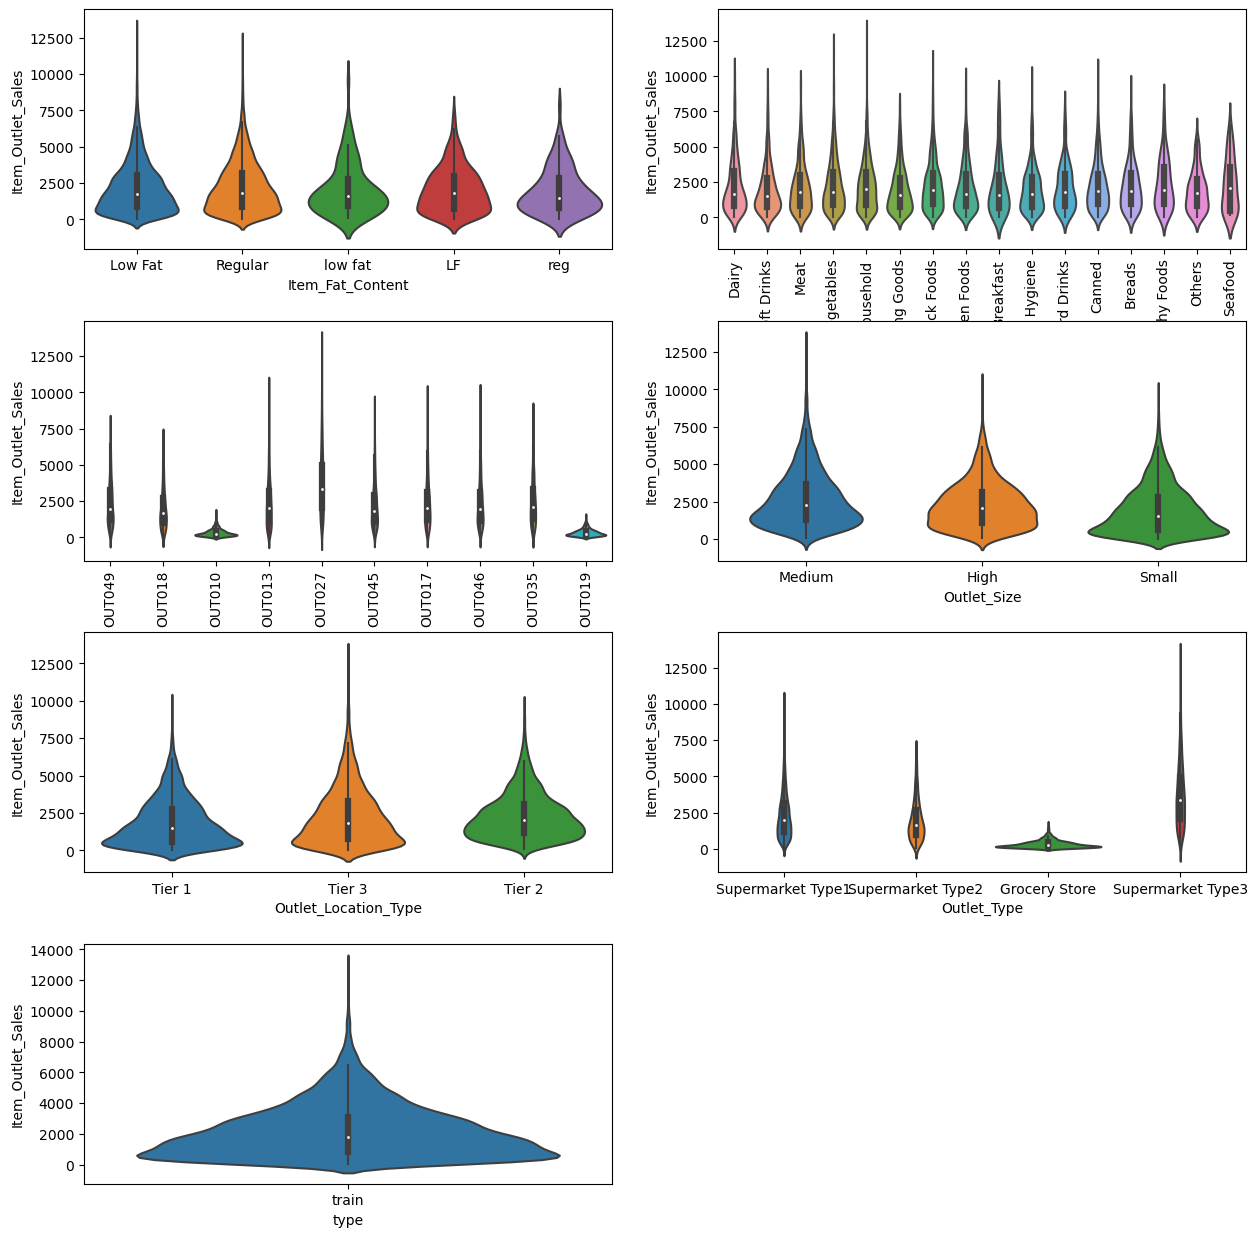

In [142]:
category_cols = train_df.select_dtypes(include=['object']).columns.drop('Item_Identifier')
count=1
plt.subplots(figsize=(15,80))
for column in category_cols:
    plt.subplot(20,2,count)
    plt.subplots_adjust(hspace = 0.3)
    sns.violinplot(x=train_df[column], y=train_df["Item_Outlet_Sales"])
    if(train_df[column].nunique() > 7):
        plt.xticks(rotation=90);
    count+=1
plt.show()

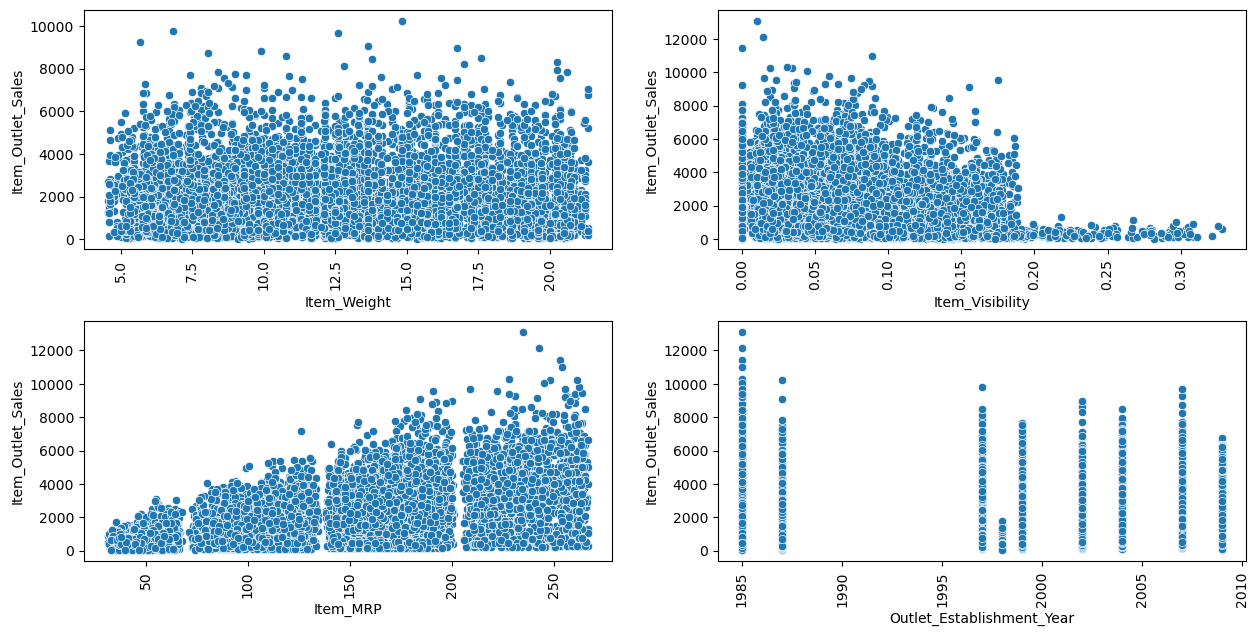

In [143]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.drop('Item_Outlet_Sales')
count=1
plt.subplots(figsize=(15,80))
for column in numeric_cols:
    plt.subplot(20,2,count)
    plt.subplots_adjust(hspace = 0.3)
    sns.scatterplot(x=train_df[column], y=train_df["Item_Outlet_Sales"])
    if(train_df[column].nunique() > 7):
        plt.xticks(rotation=90);
    count+=1
plt.show()

[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


<AxesSubplot:>

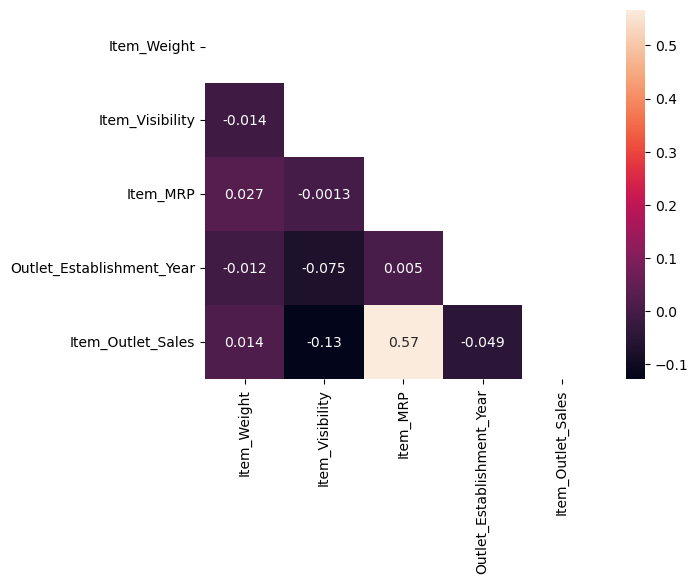

In [144]:
mask = np.triu(np.ones_like(train_df.corr()))
print(mask)
sns.heatmap(train_df.corr(),annot=True, mask=mask)

In [145]:
def plot_distribution(df,column, plot_type):
    fig,ax = plt.subplots(figsize=(12,4))
    sns.violinplot(x="Item_Outlet_Sales", y=column, data=df, style='event')



In [146]:
print(train_df.shape)
for column in data.columns:
    print('*'*len(column),column,'*'*len(column),sep="\n")
    print(train_df[column].value_counts())
    print('Unique values: ', train_df[column].nunique())

(8523, 13)
***************
Item_Identifier
***************
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Unique values:  1559
***********
Item_Weight
***********
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
Unique values:  415
****************
Item_Fat_Content
****************
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Unique values:  5
***************
Item_Visibility
***************
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Unique values:  7880
*********
Ite

# Preprocessing

Replace 'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'

In [147]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular' })
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

**"Item_Identifier" - 1st 2 letter maps to item_type**

In [148]:
data[['Item_Type','Item_Identifier']]

Item_Type Item_Identifier
0                      Dairy           FDA15
1                Soft Drinks           DRC01
2                       Meat           FDN15
3      Fruits and Vegetables           FDX07
4                  Household           NCD19
...                      ...             ...
14199            Snack Foods           FDB58
14200          Starchy Foods           FDD47
14201     Health and Hygiene           NCO17
14202                 Canned           FDJ26
14203                 Canned           FDU37

[14204 rows x 2 columns]

In [149]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [150]:
data.loc[data['Item_Type_Combined'] == 'Non-Consumable', 'Item_Fat_Content'] = "Non-Edible"

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

In [151]:
data['outlet_years'] = 2013 - data['Outlet_Establishment_Year']

In [152]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
type                          object
Item_Type_Combined            object
outlet_years                   int64
dtype: object

In [153]:
group = data.groupby(["Item_Identifier"]).mean()
group

Item_Weight  Item_Visibility    Item_MRP  \
Item_Identifier                                             
DRA12                 11.600         0.034938  141.682067   
DRA24                 19.350         0.045646  164.016800   
DRA59                  8.270         0.133384  184.982400   
DRB01                  7.390         0.079736  189.890500   
DRB13                  6.115         0.006799  189.797444   
...                      ...              ...         ...   
NCZ30                  6.590         0.027302  121.009800   
NCZ41                 19.850         0.056396  125.757900   
NCZ42                 10.500         0.011015  236.954800   
NCZ53                  9.600         0.026330  188.554733   
NCZ54                 14.650         0.081345  162.135200   

                 Outlet_Establishment_Year  Item_Outlet_Sales  outlet_years  
Item_Identifier                                                              
DRA12                          1998.666667        1843.600200     14.333333  
DRA24                          1997.300000        2246.218971     15.700000  
DRA59                          1997.300000        2614.430150     15.700000  
DRB01                          1996.625000        1518.024000     16.375000  
DRB13                          1998.666667        2428.838400     14.333333  
...                                    ...                ...           ...  
NCZ30                          1997.300000        1807.647000     15.700000  
NCZ41                          1998.750000        1827.487840     14.250000  
NCZ42                          1997.300000        3839.801760     15.700000  
NCZ53                          1998.666667        3014.742400     14.333333  
NCZ54                          1997.300000        3249.104000     15.700000  

[1559 rows x 6 columns]

In [154]:
group.loc[group.index == 'DRA12', 'Item_Weight'].values
#.loc[group['Item_Identifier'].isin(num1_range), 'Item_Weight']

array([11.6])

In [155]:
empty_weight = data['Item_Weight'].isna()
avg_weight = data.groupby(["Item_Identifier"]).mean()
data.loc[empty_weight, 'Item_Weight'] = data.loc[empty_weight,"Item_Identifier"].apply(lambda x: avg_weight.loc[group.index == x, 'Item_Weight'].values[0])

In [156]:
data['Item_Weight'].isna().sum()

0

In [178]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type                            0
Item_Type_Combined              0
outlet_years                    0
dtype: int64

In [180]:
outlet_size_mode_pt = data.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=lambda x: x.mode())
outlet_size_mode_pt

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [177]:
data.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=lambda x: x.mode())['Supermarket Type1'].Outlet_Size

'Small'

In [164]:
data.groupby(["Outlet_Type"])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [182]:
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: outlet_size_mode_pt[x].Outlet_Size)
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type                            0
Item_Type_Combined              0
outlet_years                    0
dtype: int64

In [183]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet_Identifier'])

In [184]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
type                                  object
outlet_years                           int64
Item_Fat_Content_Low Fat               uint8
Item_Fat_Content_Non-Edible            uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_

In [185]:
data.head()

Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0           FDA15         9.30         0.016047                  Dairy   
1           DRC01         5.92         0.019278            Soft Drinks   
2           FDN15        17.50         0.016760                   Meat   
3           FDX07        19.20         0.000000  Fruits and Vegetables   
4           NCD19         8.93         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales   type  \
0  249.8092                       1999          3735.1380  train   
1   48.2692                       2009           443.4228  train   
2  141.6180                       1999          2097.2700  train   
3  182.0950                       1998           732.3800  train   
4   53.8614                       1987           994.7052  train   

   outlet_years  Item_Fat_Content_Low Fat  ...  Outlet_Identifier_OUT010  \
0            14                         1  ...                         0   
1             4                         0  ...                         0   
2            14                         1  ...                         0   
3            15                         0  ...                         1   
4            26                         0  ...                         0   

   Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         1                         0   

   Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT049  
0                         1  
1                         0  
2                         1  
3                         0  
4                         0  

[5 rows x 35 columns]

In [186]:
#Drop the columns which have been converted to different types:
# Remove Identifiers
data.drop(['Item_Type','Outlet_Establishment_Year', 'Item_Identifier', 'outlet_years'],axis=1,inplace=True)

In [187]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = ["Item_Weight", "Item_Visibility", "Item_MRP"]
data[features]=sc.fit_transform(data[features])

In [188]:
data.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales   type  \
0    -0.751014        -0.969852  1.752511          3735.1380  train   
1    -1.477653        -0.907063 -1.493696           443.4228  train   
2     1.011839        -0.956000  0.009874          2097.2700  train   
3     1.377308        -1.281712  0.661838           732.3800  train   
4    -0.830557        -1.281712 -1.403623           994.7052  train   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Non-Edible  \
0                         1                            0   
1                         0                            0   
2                         1                            0   
3                         0                            0   
4                         0                            1   

   Item_Fat_Content_Regular  Outlet_Location_Type_Tier 1  \
0                         0                            1   
1                         1                            0   
2                         0                            1   
3                         1                            0   
4                         0                            0   

   Outlet_Location_Type_Tier 2  ...  Outlet_Identifier_OUT010  \
0                            0  ...                         0   
1                            0  ...                         0   
2                            0  ...                         0   
3                            0  ...                         1   
4                            0  ...                         0   

   Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         1                         0   

   Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT049  
0                         1  
1                         0  
2                         1  
3                         0  
4                         0  

[5 rows x 31 columns]

In [189]:
#Divide into test and train:
train = data.loc[data['type']=="train"]
test = data.loc[data['type']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','type'],axis=1,inplace=True)
train.drop(['type'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [190]:
train.isna().sum()

Item_Weight                          0
Item_Visibility                      0
Item_MRP                             0
Item_Outlet_Sales                    0
Item_Fat_Content_Low Fat             0
Item_Fat_Content_Non-Edible          0
Item_Fat_Content_Regular             0
Outlet_Location_Type_Tier 1          0
Outlet_Location_Type_Tier 2          0
Outlet_Location_Type_Tier 3          0
Outlet_Size_High                     0
Outlet_Size_Medium                   0
Outlet_Size_Small                    0
Outlet_Type_Grocery Store            0
Outlet_Type_Supermarket Type1        0
Outlet_Type_Supermarket Type2        0
Outlet_Type_Supermarket Type3        0
Item_Type_Combined_Drinks            0
Item_Type_Combined_Food              0
Item_Type_Combined_Non-Consumable    0
Outlet_Identifier_OUT010             0
Outlet_Identifier_OUT013             0
Outlet_Identifier_OUT017             0
Outlet_Identifier_OUT018             0
Outlet_Identifier_OUT019             0
Outlet_Identifier_OUT027 

In [191]:
features = train.drop('Item_Outlet_Sales', axis=1)
target = train['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l1: 1239.87	valid_0's l2: 2.41278e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 1168.63	valid_0's l2: 2.15556e+06
[3]	valid_0's l1: 1109.21	valid_0's l2: 1.9552e+06
[4]	valid_0's l1: 1055.18	valid_0's l2: 1.78403e+06
[5]	valid_0's l1: 1010.33	valid_0's l2: 1.65029e+06
[6]	valid_0's l1: 970.673	valid_0's l2: 1.53844e+06
[7]	valid_0's l1: 936.405	valid_0's l2: 1.44789e+06
[8]	valid_0's l1: 905.212	valid_0's l2: 1.37163e+06
[9]	valid_0's l1: 878.275	valid_0's l2: 1.3092e+06
[10]	valid_0's l1: 856.497	valid_0's l2: 1.26085e+06
[11]	valid_0's l1: 837.371	valid_0's l2: 1.22137e+06
[12]	valid_0's l1: 820.014	valid_0's l2: 1.18658e+06
[13]	valid_0's l1: 805.68	valid_0's l2: 1.15997e+06
[14]	valid_0's l1: 793.627	valid_0's l2: 1.13852e+06
[15]	valid_0's l1: 782.122	valid_0's l2: 1.11871e+06
[16]	valid_0's l1: 773.929	valid_0's l2: 1.10459e+06
[17]	valid_0's l1: 765.863	valid_0's l2: 1.09169e

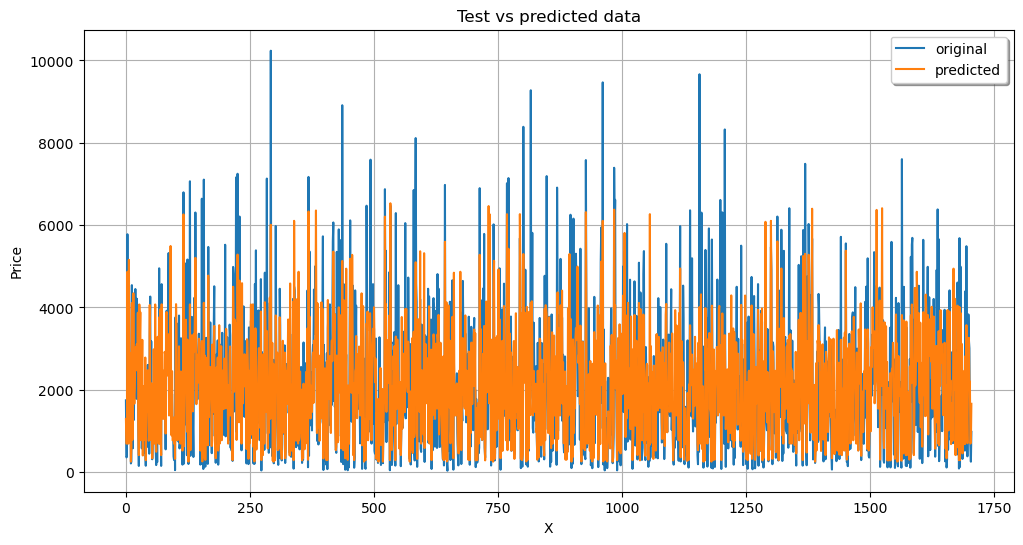

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

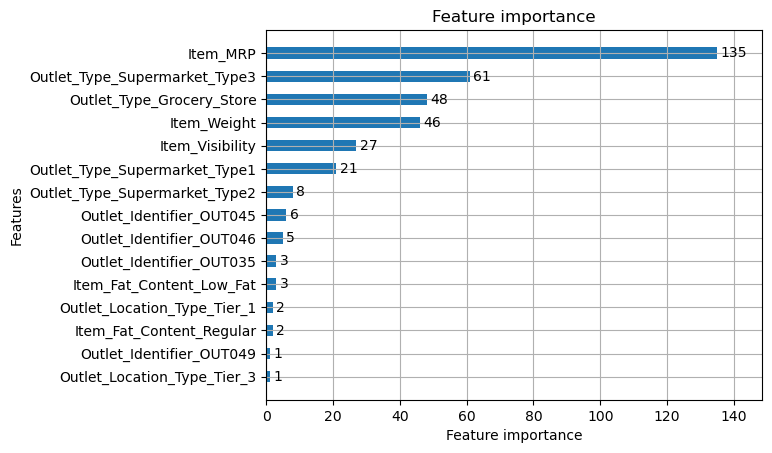

In [192]:

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}


# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

# prediction
y_pred = model.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test vs predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# plotting feature importance
lgb.plot_importance(model, height=.5) 

In [193]:
predicted_value = model.predict(test)
test_df['Item_Outlet_Sales'] = np.round(predicted_value, decimals=0)
test_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1  test             1630.0  
1               Tier 2  Supermarket Type1  test             1375.0  
2               Tier 3      Grocery Store  test              584.0  
3               Tier 2  Supermarket Type1  test             2449.0  
4               Tier 3  Supermarket Type3  test             6331.0

In [ ]:
test_df[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0              FDW58            OUT049             1631.0
1              FDW14            OUT017             1367.0
2              NCN55            OUT010              581.0
3              FDQ58            OUT017             2456.0
4              FDY38            OUT027             6456.0
...              ...               ...                ...
5676           FDB58            OUT046             2185.0
5677           FDD47            OUT018             2565.0
5678           NCO17            OUT045             1935.0
5679           FDJ26            OUT017             3670.0
5680           FDU37            OUT045             1297.0

[5681 rows x 3 columns]

In [ ]:
test_df[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']].sort_values('Item_Outlet_Sales')

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
5180           FDP59            OUT019              206.0
3208           FDP32            OUT010              223.0
4077           NCQ43            OUT010              234.0
3351           NCC07            OUT019              234.0
4440           DRL23            OUT019              234.0
...              ...               ...                ...
2169           NCV53            OUT027             6502.0
2634           NCZ42            OUT027             6538.0
1453           FDK21            OUT027             6556.0
1801           FDW43            OUT027             6585.0
4381           FDF11            OUT027             6627.0

[5681 rows x 3 columns]

In [ ]:
predicted_value = model.predict(test)
predicted_value

array([1631.34112523, 1366.54481881,  580.84320276, ..., 1934.84838242,
       3670.16607623, 1296.57570307])

In [ ]:
predicted_value.min()

206.29421326428627

In [ ]:
test_df['Item_Outlet_Sales'] = np.round(predicted_value, decimals=0)

In [ ]:
test_df[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']].to_csv("submission.csv", index=False)

In [ ]:
features.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
0    -0.751014        -0.969852  1.752511                         1   
1    -1.477653        -0.907063 -1.493696                         0   
2     1.011839        -0.956000  0.009874                         1   
3     1.377308        -1.281712  0.661838                         0   
4    -0.830557        -1.281712 -1.403623                         0   

   Item_Fat_Content_Non-Edible  Item_Fat_Content_Regular  \
0                            0                         0   
1                            0                         1   
2                            0                         0   
3                            0                         1   
4                            1                         0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Size_High  ...  \
0                            0                 0  ...   
1                            1                 0  ...   
2                            0                 0  ...   
3                            1                 0  ...   
4                            1                 1  ...   

   Outlet_Identifier_OUT010  Outlet_Identifier_OUT013  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         1                         0   
4                         0                         1   

   Outlet_Identifier_OUT017  Outlet_Identifier_OUT018  \
0                         0                         0   
1                         0                         1   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT019  Outlet_Identifier_OUT027  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  
0                         0                         1  
1                         0                         0  
2                         0                         1  
3                         0                         0  
4                         0                         0  

[5 rows x 29 columns]